In [3]:
from math import cos, sin, sqrt, atan, acos, asin
from numpy import pi, dot
from PIL import Image
from IPython.display import display, clear_output
import numpy as np
from numpy.linalg import norm
from numba import njit,prange

In [9]:
#scratch functions, notes, etc.

#fresnel refelctance vs transmission:
#"Unpolarized light contains same quantity of p- and s-polarizations. Therefore, the angular reflectance for
#unpolarized light is the average of the two angular reflectances"

'''
@njit
def angle(r0,v): #assume that the ray intersects the sphere
    t = lsi(r0,v)
    nnormal = -t*v - r0
    return acos(dot(nnormal, v0)/(R*norm(v))) #R = norm(nnormal
'''
pass

In [10]:
#Constants of the sphere
R = 1       #radius of sphere centered at origin
N = 4.0/3.0 #refractive index

#Constants for the camera
viewfinder_size = 3 #Units wide
pixels_per_unit = 100   #pixels per unit
camera_rad = 1000.0  #how far camera is from origin
viewfinder_rad = 4.0 #how far viewfinder is from origin
xy_angle = 0.0 #0.0 radians around the xy plane corresponds to +x
z_angle = 0.0 #0.0 radians around z plane corresponds to staying on xy plane
size = viewfinder_size * pixels_per_unit

#Constants for the image produced
im_arr = np.zeros((size,size,3), dtype=np.uint8)
anti_aliasing = 1 #nxn multi sampling done per subpixel

In [18]:
@njit
def fresnel(t1, t2):
    ct1 = cos(t1)
    ct2 = cos(t2)
    p = ((n*ct1 - ct2)/(n*ct1 + ct2))**2
    s = ((ct1 - n*ct2)/(ct1 + n*ct2))**2
    reflectance = (p+s)/2
    return reflectance

@njit
def lsi(ray): #line sphere intersect
    r0 = ray.r0
    v = ray.v
    a,b,c,d,e,f = r0[0], r0[1], r0[2], v[0], v[1], v[2]
    t2, t1, t0 = (d*d+e*e+f*f), 2*(a*d+b*e+c*f),(a*a+b*b+c*c-R*R) 
    det = t1*t1 - 4*t2*t0
    return -1.0 if det < 0 else ((sqrt(det) - t1)/(2*t2))
    
@njit
def reflect(ray): #assume that the ray intersects the sphere
    t = lsi(r0, v)
    normal = r0 + t*v
    return (normal, v + (2*dot(v, normal))*normal)
                
@njit
def refract(ray):
    #assume that the ray intersects the sphere
    #n1 sin(theta1) = n2 sin(theta2); n1 = 1
    t = lsi(r0, v)
    normal = r0 + t*v
    vperp = v - dot(v,normal)*norm
    perp = norm(perp)/(norm(v)*N)
    parallel = 1 - perp*perp
    vout = parallel*normal + perp*vperp
    return (normal, vout)

In [34]:
class Ray:
    TOL = 1e-13
    
    def __init__(self, r0, v, in_sphere, A): #3 double, 3 double, 1 boolean, 1 double = 57 bytes
        self.r0 = r0
        self.v = v
        self.in_sphere = in_sphere
        self.A = A
        
    def project():
        t = lsi(self.r0, self.v)
        if t < tol:
            pass #doesn't intersect sphere
        else:
            pass #intersects sphere
        
    def sphere_intersect():
        r0 = self.r0
        v = self.v
        a,b,c,d,e,f = r0[0], r0[1], r0[2], v[0], v[1], v[2]
        t2, t1, t0 = (d*d+e*e+f*f), 2*(a*d+b*e+c*f),(a*a+b*b+c*c-R*R) 
        det = t1*t1 - 4*t2*t0
        if det < TOL:
            return False
        else:
            return True
        
    def intersection_point():
        r0 = self.r0
        v = self.v
        a,b,c,d,e,f = r0[0], r0[1], r0[2], v[0], v[1], v[2]
        t2, t1, t0 = (d*d+e*e+f*f), 2*(a*d+b*e+c*f),(a*a+b*b+c*c-R*R) 
        det = t1*t1 - 4*t2*t0
        return ((sqrt(det) - t1)/(2*t2))
    
    def reflect():
        t = intersection_point()
        p = self.r0 + self.v*t
        if self.in_sphere:
            normal = -1*p/norm(p)
            return Ray(p, v + (2*dot(v, normal))*normal, True, self.A)
        else:
            normal = p/norm(p)
            return Ray(p, v + (2*dot(v, normal))*normal, False, self.A)
        
    def refract():
        t = intersection_point()
        p = self.r0 + self.v*t
        
        
        vperp = v - dot(v,normal)*norm
        perp = norm(perp)/(norm(v)*N)
        parallel = 1 - perp*perp
        vout = parallel*normal + perp*vperp
        return (normal, vout)
        if self.in_sphere: #will be refracting out of sphere
            normal = p/norm(p)
            #n1sin(t1) = n2sin(t2), n2 = 1, n1 = N
            #check for total internal refraction
            
    #
            
            
        

In [29]:
def main():
    im_size = 3 #units width
    ppu = 1000 #pixels per unit
    size = im_size*ppu
    im_arr = np.zeros((size, size, 3), dtype = np.uint8)

    for i in range(size):
        if i%ppu == 0:
            print(i/ppu)
        for j in prange(size):
            z = (i/size - 0.5) * (im_size)
            y = (j/size - 0.5) * (im_size)
            x = 14

    #         v = np.asarray([0.0,0.0,-1.0], dtype=np.float64)
    #         r0 = np.asarray([x,y,z], dtype=np.float64)
            xv = (-1.0,0.0,0.0)
            xr0 = (x,y,z)
#             print(xr0)
            im_arr[i][j] = np.asarray([255,255,255], dtype=np.uint8) * ray(xr0, xv, 1.0)
#             if hit >=0:
                
#             else:
#                 im_arr[i][j] = np.asarray([0,0,0], dtype=np.uint8)
    #         print(hit, x, y, z)
    
    return im_arr

0.0
1.0
2.0


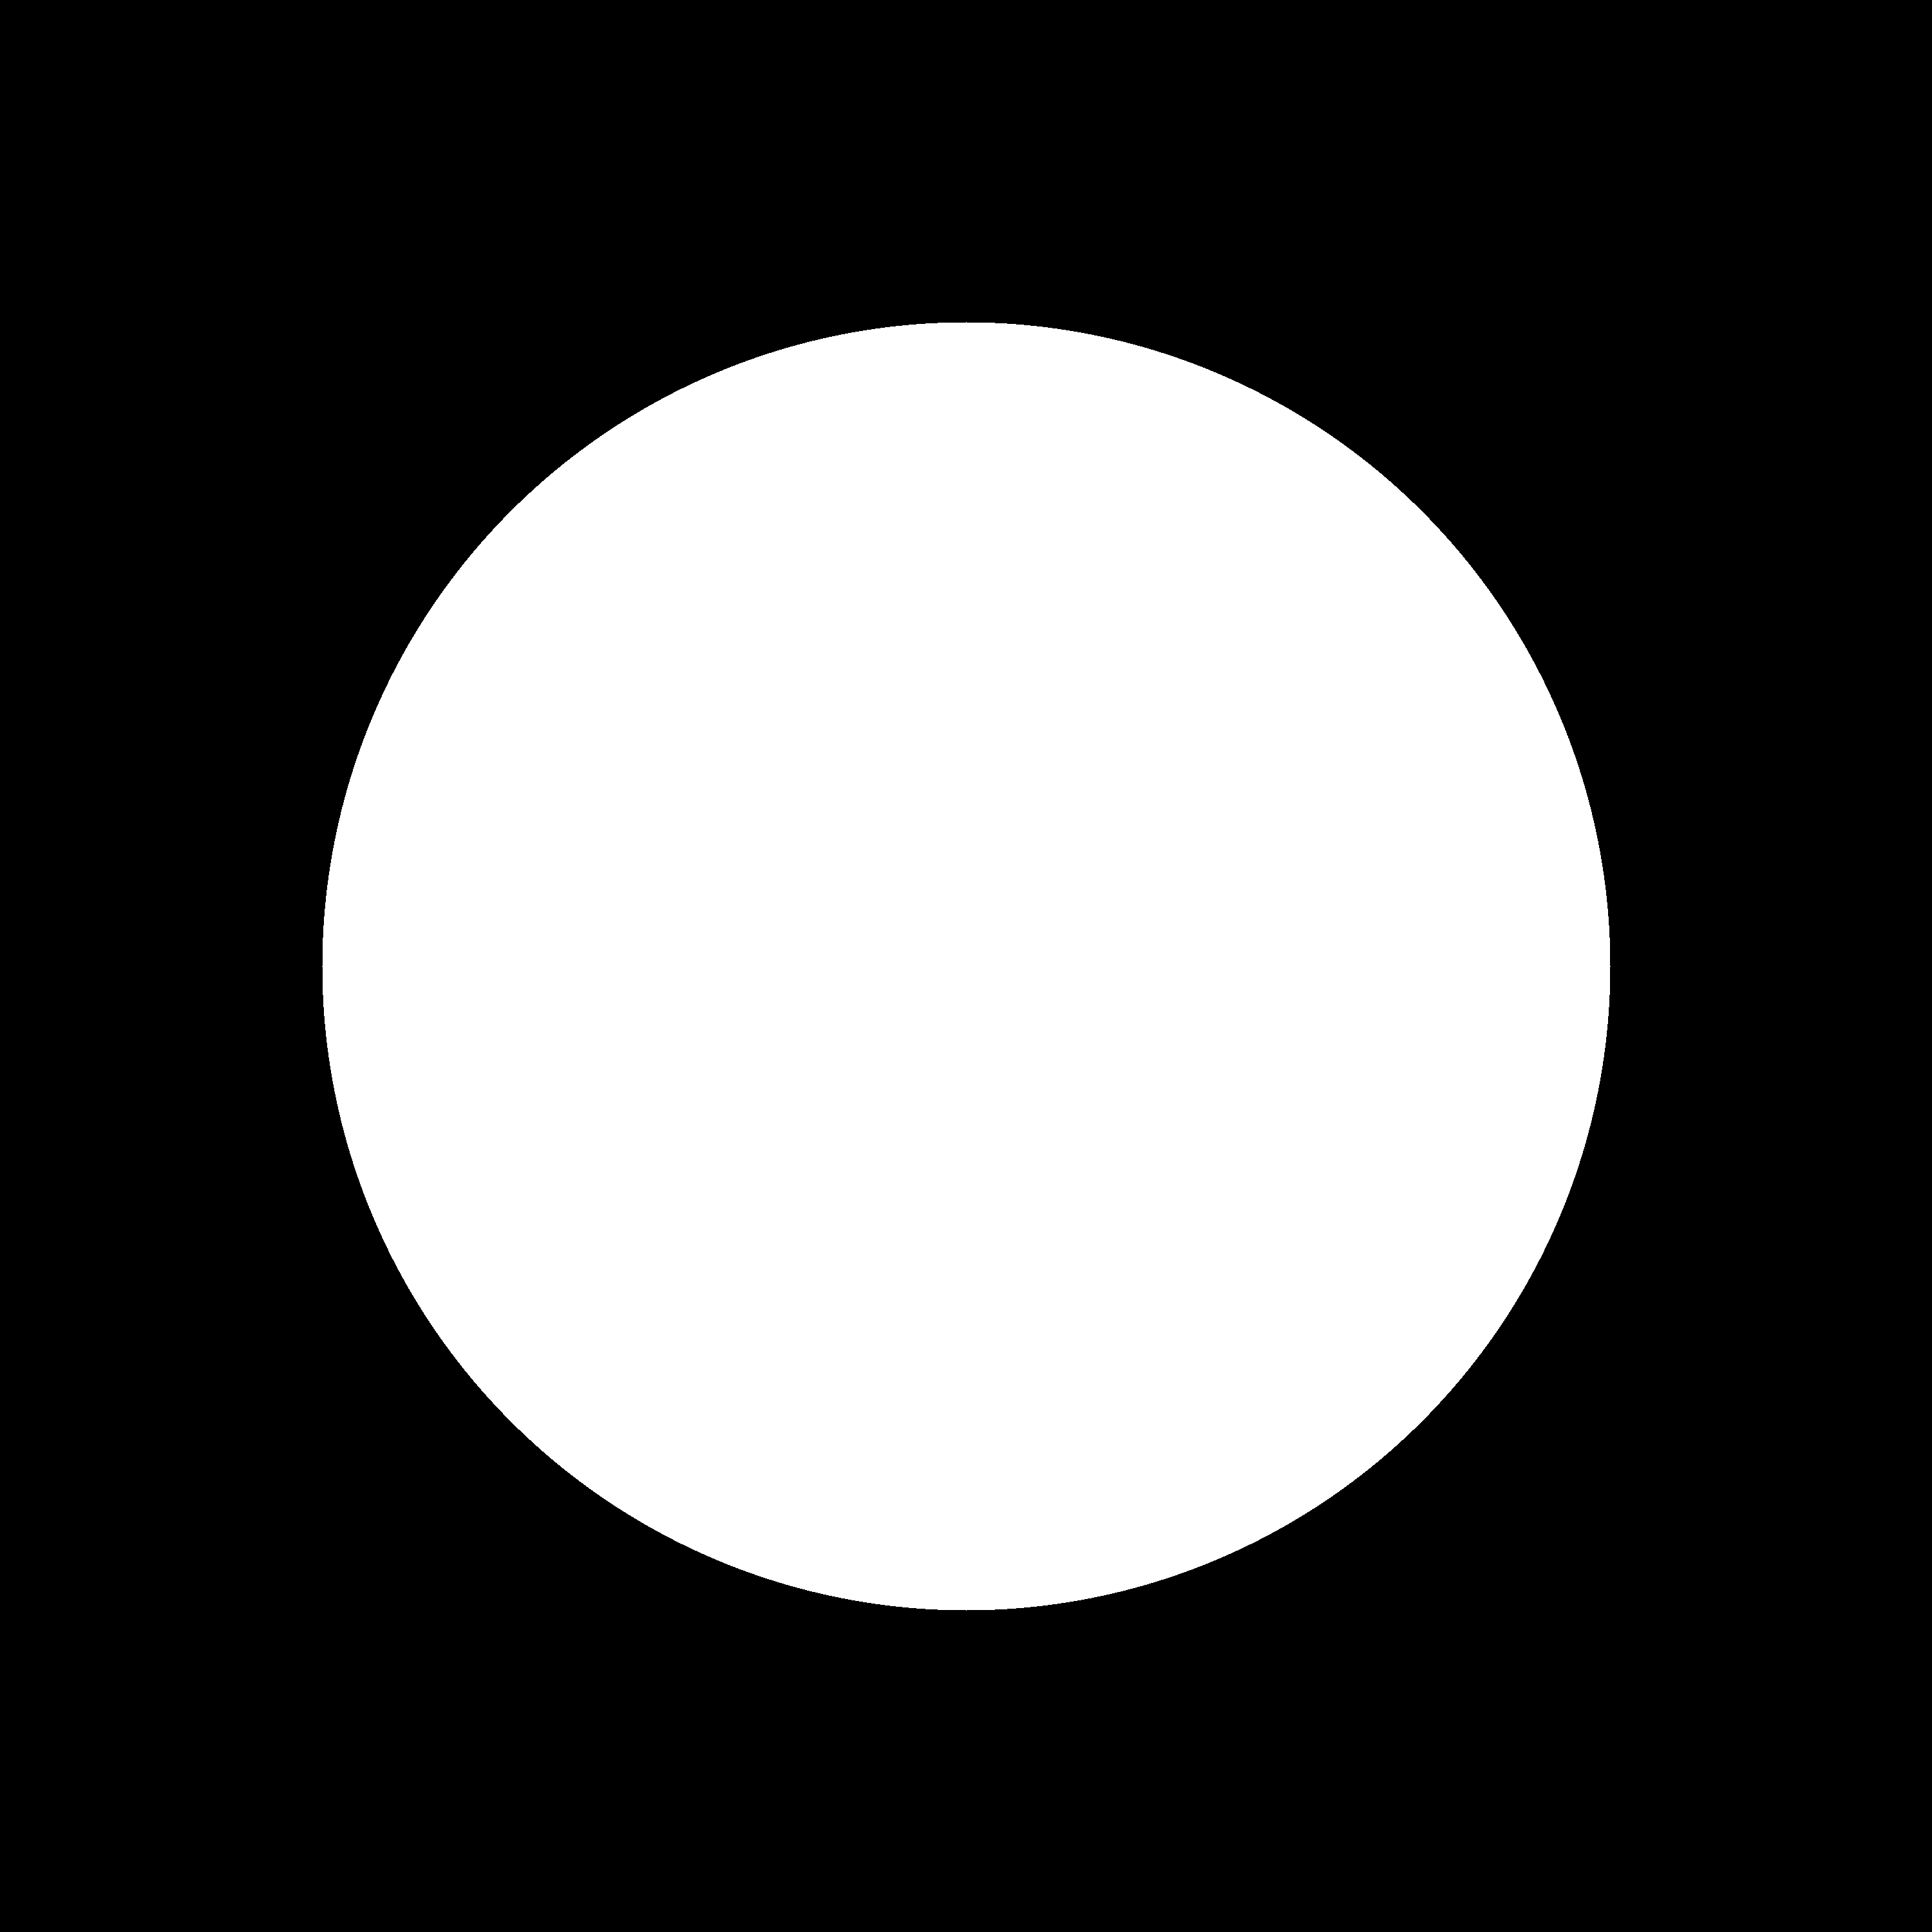

In [31]:
ia = main()
vf = Image.fromarray(ia)
display(vf)